# Маркетинговый анализ развлекательного приложения 


# Цели иследования:
Источники данных:
- лог сервера с данными об их посещениях;
- выгрузка их покупок за этот период;
- рекламные расходы;
1. Необходимо провести следующие действия с данными:
- Составьте профили пользователей; 
- определить количество пользователей и процент платящих пользователей в разрезе стран, устройств и каналов привлечения;
- определить суммарные расходы на маркетинг;
- определить распределение расходов на маркетинг по каналам привлечения; 
- визуализировать недельную и месячную динамику расходов на каналы привлечения;
- расчитать величину САС из каждого источника.
2. Провести оценку окупаемости рекламы, рассмотрев следующие метрики:
- LTV, динамику LTV, ROI, динамику ROI, динамику САС для всех пользователей;
- конверсию и удержание для всех пользователей;
- LTV, динамику LTV, ROI, динамику ROI, динамику CAC в разрезе устройств пользователя;
- LTV, динамику LTV, ROI, динамику ROI, динамику CAC в разрезе стран пользователей;
- LTV, динамику LTV, ROI, динамику ROI, динамику CAC в разрезе рекламных каналов;
3. Сделать выводы об общей окупаемости рекламы.
4. Определить влияющие факторы на окупаемость рекламы.
5. Проанализировав все данные, определить рекомендации по улучшению окупаемости рекламы.

### Предобработка данных

#### Загрузка необходимых бибилиотек

In [1]:
import pandas as pd #импортируем pandas

In [2]:
from matplotlib import pyplot as plt #импортируем matplotlib

In [3]:
import numpy as np #импортируем numpy

In [4]:
from datetime import datetime, timedelta #импортируем datetime

#### Загрузка данных

In [5]:
visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')# загрузим данные с визитами в переменную visits

In [6]:
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv') #загрузим данные с заказами в переменную orders

In [7]:
costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv') #загрузим данные с заказами в переменную costs

In [8]:
visits.head()#выведим visits

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

In [9]:
visits.info()#выведим информацию по visits

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Изменим типы данных в visits

#### Форматирование и обработка пропусков

In [10]:
visits.columns = visits.columns.str.lower() #приведем наименования к нижнему регистру

In [11]:
visits.rename(columns = {'user id': 'user_id', 'session start':'session_start', 'session end': 'session_end'}, inplace = True)
#приведем наименования к "змеиному регистру"

In [12]:
visits['region'] = visits['region'].astype('str') #изменим тип данных на строковый

In [13]:
visits['device'] = visits['device'].astype('str')#изменим тип данных на строковый

In [14]:
visits['channel'] = visits['channel'].astype('str')#изменим тип данных на строковый

In [15]:
visits['session_start'] = pd.to_datetime(visits['session_start']) #приведем к формату даты

In [16]:
visits['session_end'] = pd.to_datetime(visits['session_end'])#приведем к формату даты

In [17]:
visits.isna().sum() #проверим пропуски в данных

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [18]:
visits.duplicated().sum() #проверим на наличие явных дубликатов

0

In [19]:
orders.head() #выведим первые строки orders

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

In [20]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [21]:
orders.columns = orders.columns.str.lower() #приведем к нижнему регистру

In [22]:
orders.rename(columns = {'user id':'user_id', 'event dt':'event_dt'}, inplace = True) #приведем наименования столбцов к нижнему регистру

In [23]:
orders['event_dt'] = pd.to_datetime(orders['event_dt']) #приведем столбец event_dt к формату даты

In [24]:
orders.isna().sum() #проверим orders на наличие пропусков

user_id     0
event_dt    0
revenue     0
dtype: int64

In [25]:
orders.duplicated().sum() #проверим orders на наличие явных дубликатов

0

In [26]:
costs.head() # выведим costs

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

In [27]:
costs.info() #выведим информацию о costs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [28]:
costs.columns = costs.columns.str.lower() #выведим информацию о costs

In [29]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date #изменим на формат даты

In [30]:
costs['channel'] = costs['channel'].astype('str') #изменим на строковый формат

In [31]:
costs.isna().sum()# проверим наличие пропусков в costs

dt         0
channel    0
costs      0
dtype: int64

In [32]:
costs.duplicated().sum()#проверим наличие явных дубликатов

0

### Создание функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

Функция формирования профилей

In [33]:
def get_profiles(sessions, orders, costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    return profiles

функция формирования удержания

In [34]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

функция формирования конверсии

In [35]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time


функция формирования LTV

In [36]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

функция сглаживания

In [37]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 


функция визуализации удержания

In [38]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

функция визуализации конверсии

In [39]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

функция визуализации LTV и ROI

In [40]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=14):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

- Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.
- Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Определим, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Пострим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [41]:
profiles = get_profiles(visits, orders, costs) #составим профили пользователей

In [42]:
profiles.head(10) #выведим профили пользователей

user_id            first_ts       channel   device         region  \
0    599326 2019-05-07 20:58:57      FaceBoom      Mac  United States   
1   4919697 2019-07-09 12:46:07      FaceBoom   iPhone  United States   
2   6085896 2019-10-01 09:58:33       organic   iPhone         France   
3  22593348 2019-08-22 21:35:48    AdNonSense       PC        Germany   
4  31989216 2019-10-02 00:07:44       YRabbit   iPhone  United States   
5  34186288 2019-05-09 17:29:23       organic  Android  United States   
6  38448301 2019-08-16 11:56:00       organic  Android  United States   
7  46006712 2019-06-30 03:46:29    AdNonSense  Android         France   
8  58263264 2019-05-11 19:18:43      FaceBoom   iPhone  United States   
9  59835779 2019-05-11 21:13:47  MediaTornado   iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False               NaN  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769  
5  2019-05-09 2019-05-01  False               NaN  
6  2019-08-16 2019-08-01  False               NaN  
7  2019-06-30 2019-06-01   True          1.008000  
8  2019-05-11 2019-05-01  False          1.128205  
9  2019-05-11 2019-05-01  False          0.250435

In [43]:
f"минимальная дата привлечения пользователей {profiles['first_ts'].min()}" #выведим максимальную дату привлечения  

'минимальная дата привлечения пользователей 2019-05-01 00:00:41'

In [44]:
f"максимальная дата привлечения пользователей {profiles['first_ts'].max()}" #выведим минимальную дату привлечения

'максимальная дата привлечения пользователей 2019-10-27 23:59:04'

Построим таблицу, показывающую количество платящих пользователй по региону

In [45]:
def percentage(profiles, criterion = []):
    reg_buyer = pd.DataFrame()  
    reg_buyer['users'] = profiles.groupby(criterion)['user_id'].count() #сгрупируем пользователей по регионам и посчитаем их количество
    reg_buyer['users_part'] = ((reg_buyer['users'] / profiles[criterion].count()) * 100) #вычислим процент пользователей по стране 
    reg_buyer['payer'] = profiles.groupby(criterion).agg({'payer': 'sum'})  
    reg_buyer['payer_part'] = ((reg_buyer['payer'] / profiles.query('payer == True')[criterion].count()) * 100)
    reg_buyer['payer_by_criterion'] = (reg_buyer['payer']/reg_buyer['users'])*100
    result = reg_buyer.sort_values(by=['payer_part', 'users_part', 'payer_by_criterion'], ascending=False).style.format({'payer_part': '{:.2f}%', 'users_part':'{:.2f}%', 'payer_by_criterion':'{:.2f}%'})
    return result

In [46]:
percentage(profiles, criterion = 'region')

Вывод: 
- наибольшее количество платящих пользователей от общего числа приходится на соединенные штаты ~79%.  

- далее по убыванию идёт соединенное королевство ~7.3%, франция ~ 7.1% и Германия ~ 6.5%




Число платящих клиентов из США ~ 7%, далее идут Германия, Франция, и Великобритания с ~ 4%

In [47]:
percentage(profiles, criterion = 'device')

**Вывод**: 
- Наибольшее количество платящих пользователей приходится на IPhone;
- Наименьшее количество платящих пользователей приходится на PC;

In [48]:
percentage(profiles, criterion = 'channel')


**Вывод**: 
- наибольшее количество платящих пользователей от общего числа приходит с канала FaceBoom (~ 46%);  
- наименьшее количество платящих пользователей от общего числа приходит с канала MediaTornado (~ 2%).
- Наибольшее число платящих пользователей в каналах FaceBoom ~ 12%, AdNonSence ~ 11% и lambdaMediaAds ~ 11%


### Маркетинг

- Посчитаем общую сумму расходов на маркетинг.
- Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Пострим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнакм, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [49]:
costs['costs'].sum() #выведим сумму расходов на маркетинг

105497.30000000002

Общая сумма расходов на маркетинг составляет: 105497

In [50]:
cbs = costs.groupby('channel')['costs'].sum().sort_values(ascending = False) #посчитаем траты на каждый источник 
cbs

channel
TipTop                54751.30
FaceBoom              32445.60
WahooNetBanner         5151.00
AdNonSense             3911.25
OppleCreativeMedia     2151.25
RocketSuperAds         1833.00
LeapBob                1797.60
lambdaMediaAds         1557.60
MediaTornado            954.48
YRabbit                 944.22
Name: costs, dtype: float64

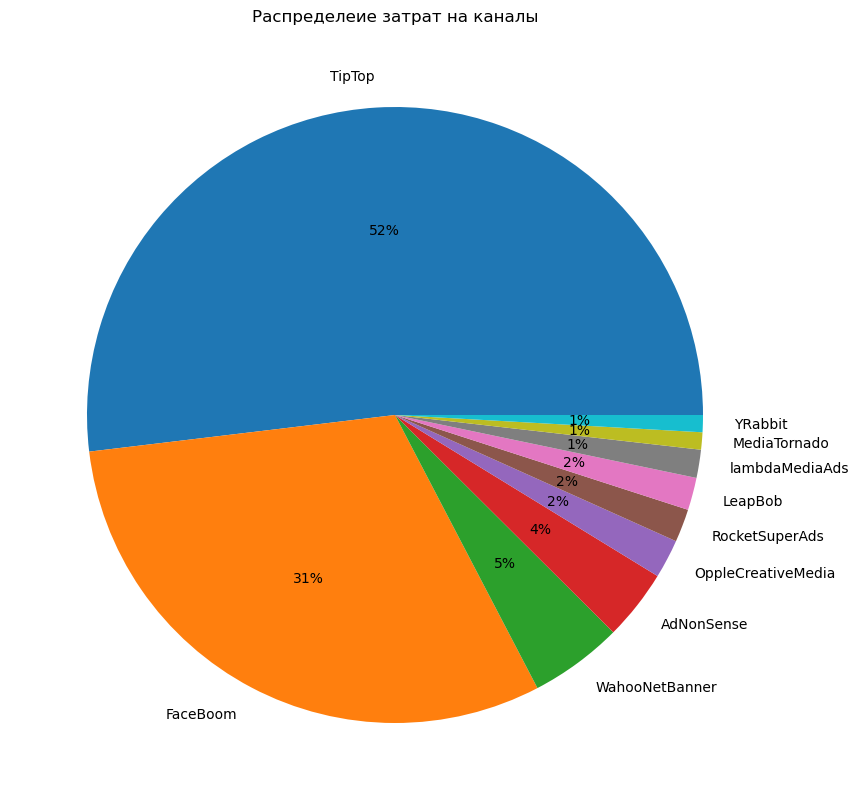

In [51]:
cbs.plot(kind = 'pie', y = 'channel', figsize = (20,10), title = 'Распределеие затрат на каналы', autopct = '%1.0f%%')#построим график
plt.ylabel('')
plt.show()

**Вывод**:
Наибольшие траты на рекламный источник TipTop - 54751 (52% от суммы всех трат). Далее по затратам следует FaceBoom - 32445 (31% от суммы всех трат). На третьем месте WahooNetBanner - 5151 (5% от суммы всех трат). На остальные источники призодится по 4%-1% от общих трат на рекламу.

Не смотря на то, что на канал TipTop приходится 52% трат на рекламу, привлеченных платящих пользователей 24%. При этом, на канал FaceBoom приходится 46% платящих пользователей, а затраты составялют 31%. Так как это самые крупные каналы по привлечению платящих пользовавтелей, перераспределение бюджета между ними будет иметь значительный эффект на окупаемость рекламы.

In [52]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [53]:
costs['week'] = costs['dt'].dt.isocalendar().week#создадим столбец с неделями

In [54]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
 3   week     1800 non-null   UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(1), object(1)
memory usage: 51.1+ KB


In [55]:
costs['month'] = costs['dt'].dt.month #cсоздадим столбец с месяцами 

In [56]:
dynamics_week = costs.pivot_table(index = 'week', columns = 'channel', values = 'costs', aggfunc = 'sum') 

In [57]:
dynamics_month = costs.pivot_table(index = 'month', columns = 'channel', values = 'costs', aggfunc = 'sum')

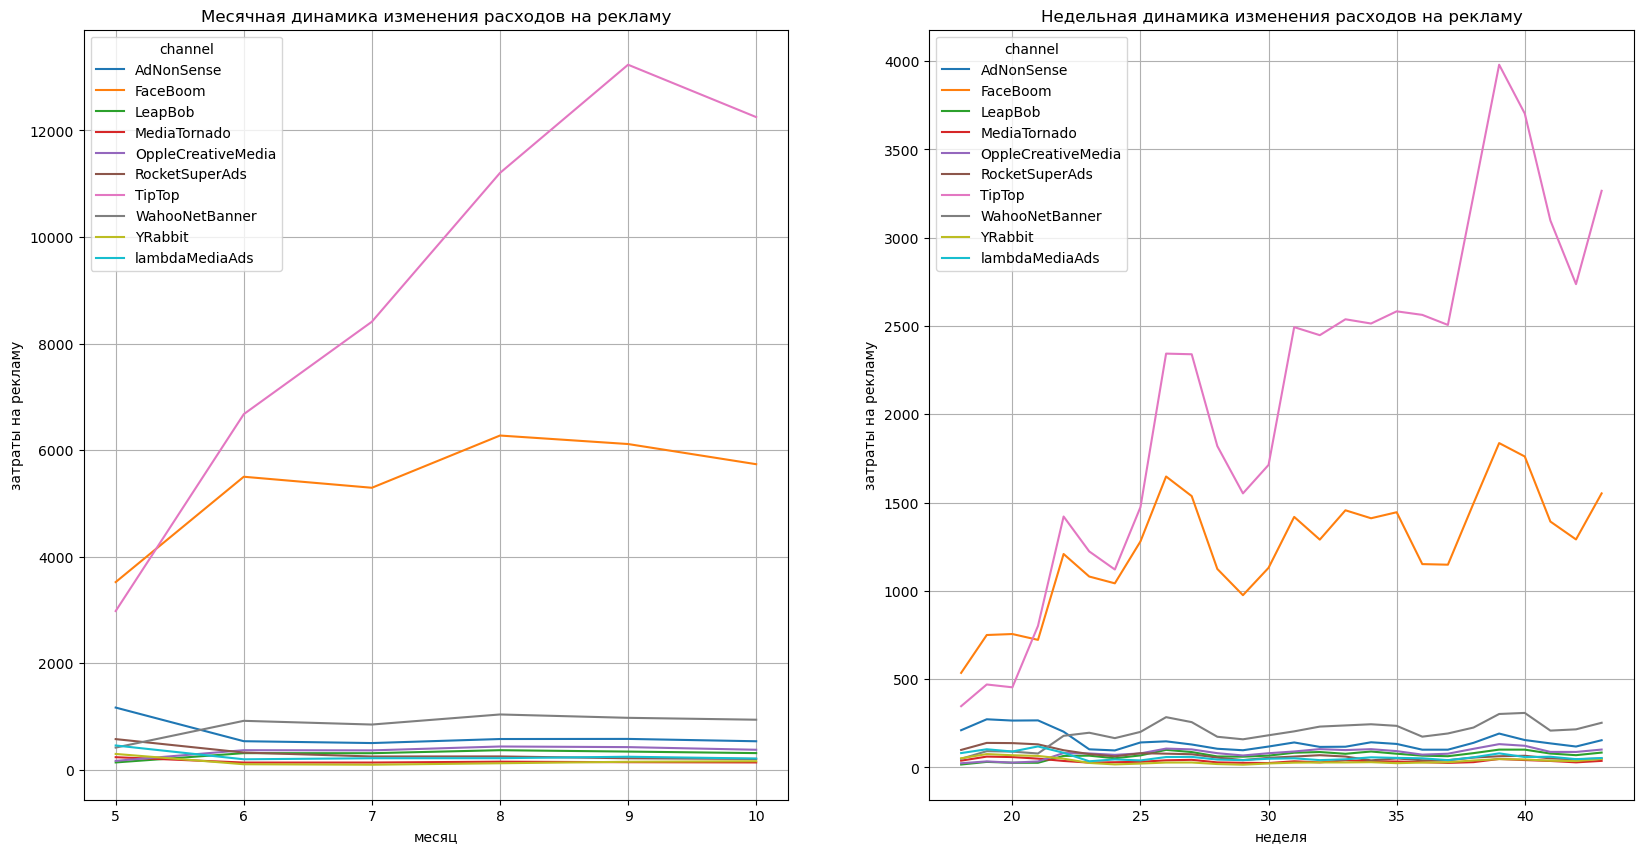

In [58]:
dynamics_month.plot(ax = plt.subplot(1,2,1),
                        grid = True,
                        figsize = (20,10))
plt.title('Месячная динамика изменения расходов на рекламу')
plt.ylabel('затраты на рекламу')
plt.xlabel('месяц')
dynamics_week.plot(ax = plt.subplot(1,2,2),
                        grid = True,
                        figsize = (20,10))
plt.title('Недельная динамика изменения расходов на рекламу')
plt.ylabel('затраты на рекламу')
plt.xlabel('неделя')
plt.show()

Вывод:
Расходы на привлечения из TipTop месячной и недельной динамики показывали значительный рост на протяжении всего периода наблюдений. Месячная динамика расходов на Faceboom в росла вместе с TipTop в первый месяц наблюдений затем стабилизировалась на ~6000, недельная динамика повторяла тренды Faceboom, однако, показывала меньший рост. Остальные каналы привлечения имели стабильную месячную и недельную динамику расходов.

In [59]:
costs_other = costs.query('channel != ["FaceBoom", "TipTop"]')

In [60]:
dynamics_week_other = costs_other.pivot_table(index = 'week', columns = 'channel', values = 'costs', aggfunc = 'sum') 

In [61]:
dynamics_month_other = costs_other.pivot_table(index = 'month', columns = 'channel', values = 'costs', aggfunc = 'sum')

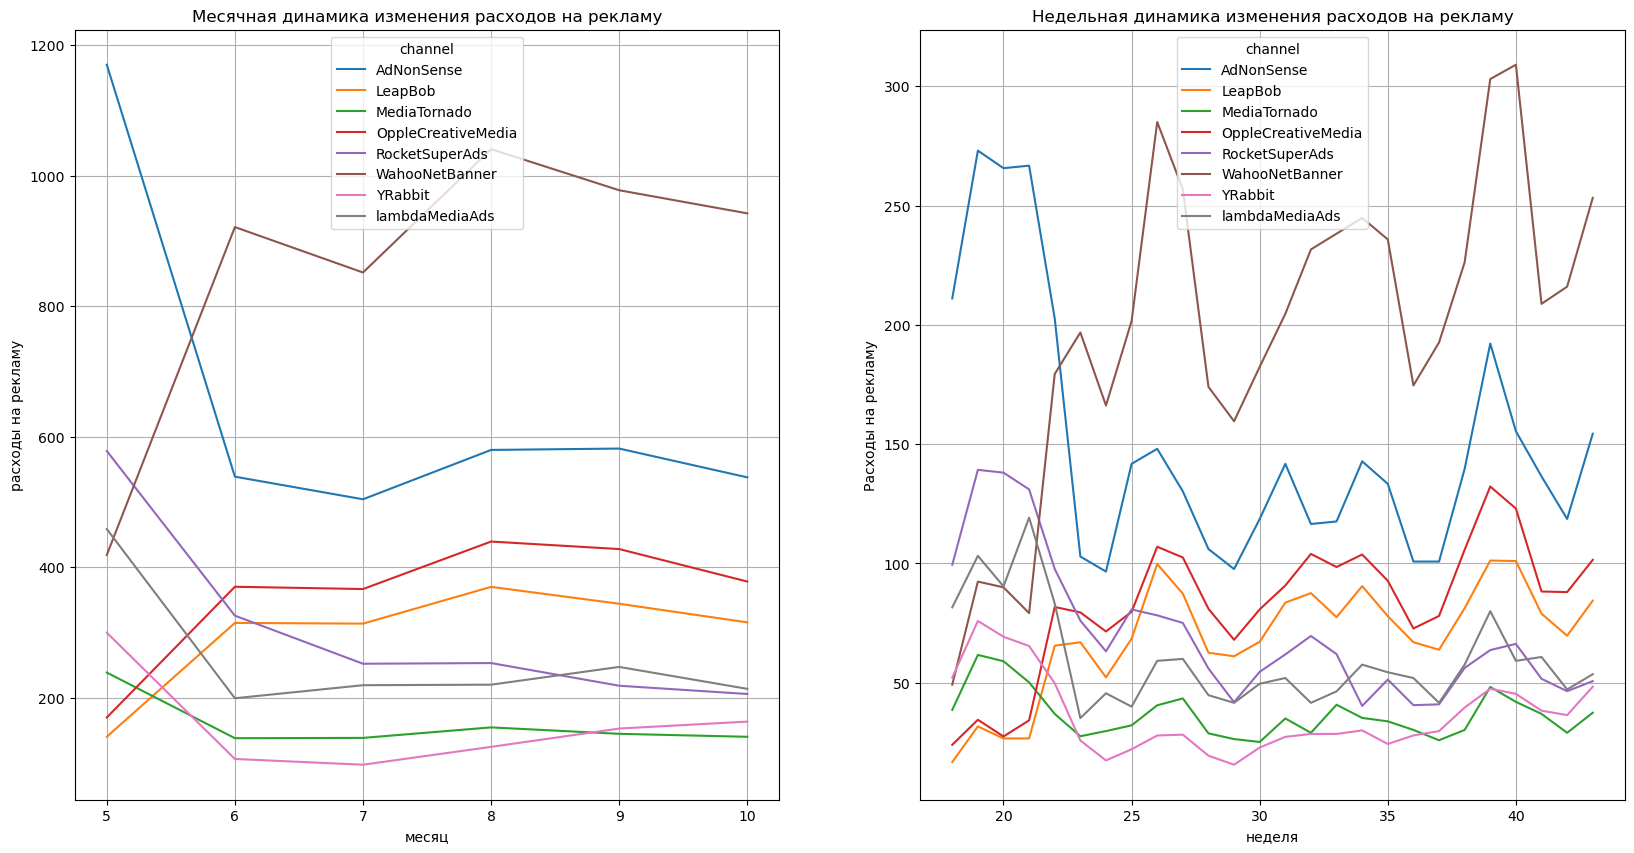

In [62]:
dynamics_month_other.plot(ax = plt.subplot(1,2,1),
                        grid = True,
                        figsize = (20,10))
plt.title('Месячная динамика изменения расходов на рекламу')
plt.ylabel('расходы на рекламу')
plt.xlabel('месяц')
dynamics_week_other.plot(ax = plt.subplot(1,2,2),
                        grid = True,
                        figsize = (20,10))
plt.title('Недельная динамика изменения расходов на рекламу')
plt.ylabel('Расходы на рекламу')
plt.xlabel('неделя')
plt.show()

Исключив два крупных канала, можно наблюдать, что по месячной динамике затраты на все каналы снизились, кроме WahooNetBanner.
По недельной динамике у WahooNetBanner наблюдается тенденция на увеличение расходов, остальные каналы стабильны с сезонными скачками.

In [63]:
med_cac = profiles.pivot_table(index = 'channel', values = 'acquisition_cost', aggfunc = 'mean'
                    ).rename(columns = {'acquisition_cost':'cac'}
                    ).sort_values(by = 'cac', ascending = False)
med_cac.style.background_gradient('coolwarm')

In [64]:
med_cac_total = round(med_cac['cac'].mean(), 1)
f"средний общий САС равен: {med_cac_total}"

'средний общий САС равен: 0.8'

In [65]:
mean_cac = round(profiles['acquisition_cost'].mean(), 1)
f'средний CAC равен: {mean_cac}'

'средний CAC равен: 1.1'

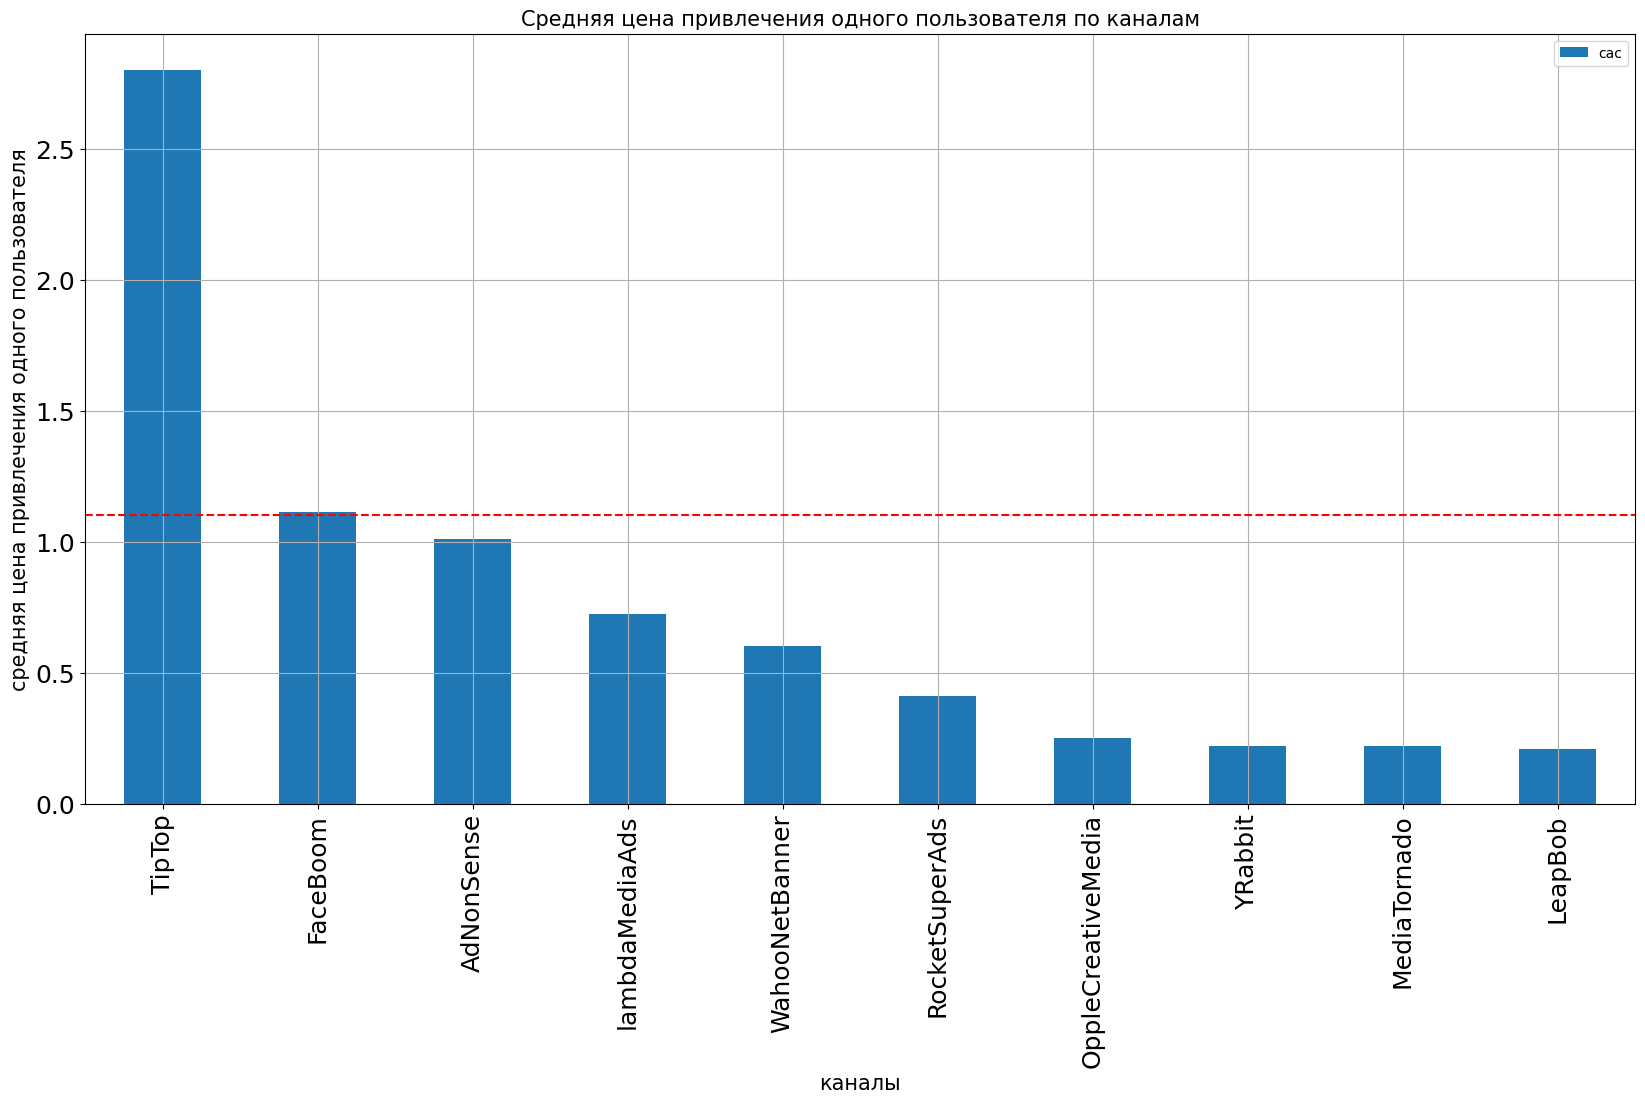

In [94]:
med_cac.plot(kind = 'bar', y= 'cac', figsize = (20,10), grid = True, fontsize=18)
plt.axhline(y = mean_cac, color='red', linestyle='--', label = 'средний CAC')
plt.title('Средняя цена привлечения одного пользователя по каналам', fontsize = 15)
plt.xlabel('каналы', fontsize= 15)
plt.ylabel('средняя цена привлечения одного пользователя', fontsize = 15)
plt.show()

**Вывод**: Наибольшие затраты на привлечение одного пользователя у канала TipTop (~ 2.8 на одного клиента) и превосходят затраты на следующий источник более чем в два раза. Далее идут FaceBoom(~ 1.1 на одного пользователя), AdNonSense c (~ 1 на одного пользователя). Затраты на привлечение одного пользователя лежат в диапазоне - 0.7 : 0.2. Средний CAC = ~ 1.1

### Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Примем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

- Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.
- Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на следующие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

In [67]:
observation_date = datetime(2019,11,1).date()

In [68]:
horizon_days = 14

In [69]:
profiles = profiles.query('channel != "organic"')

In [70]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days)

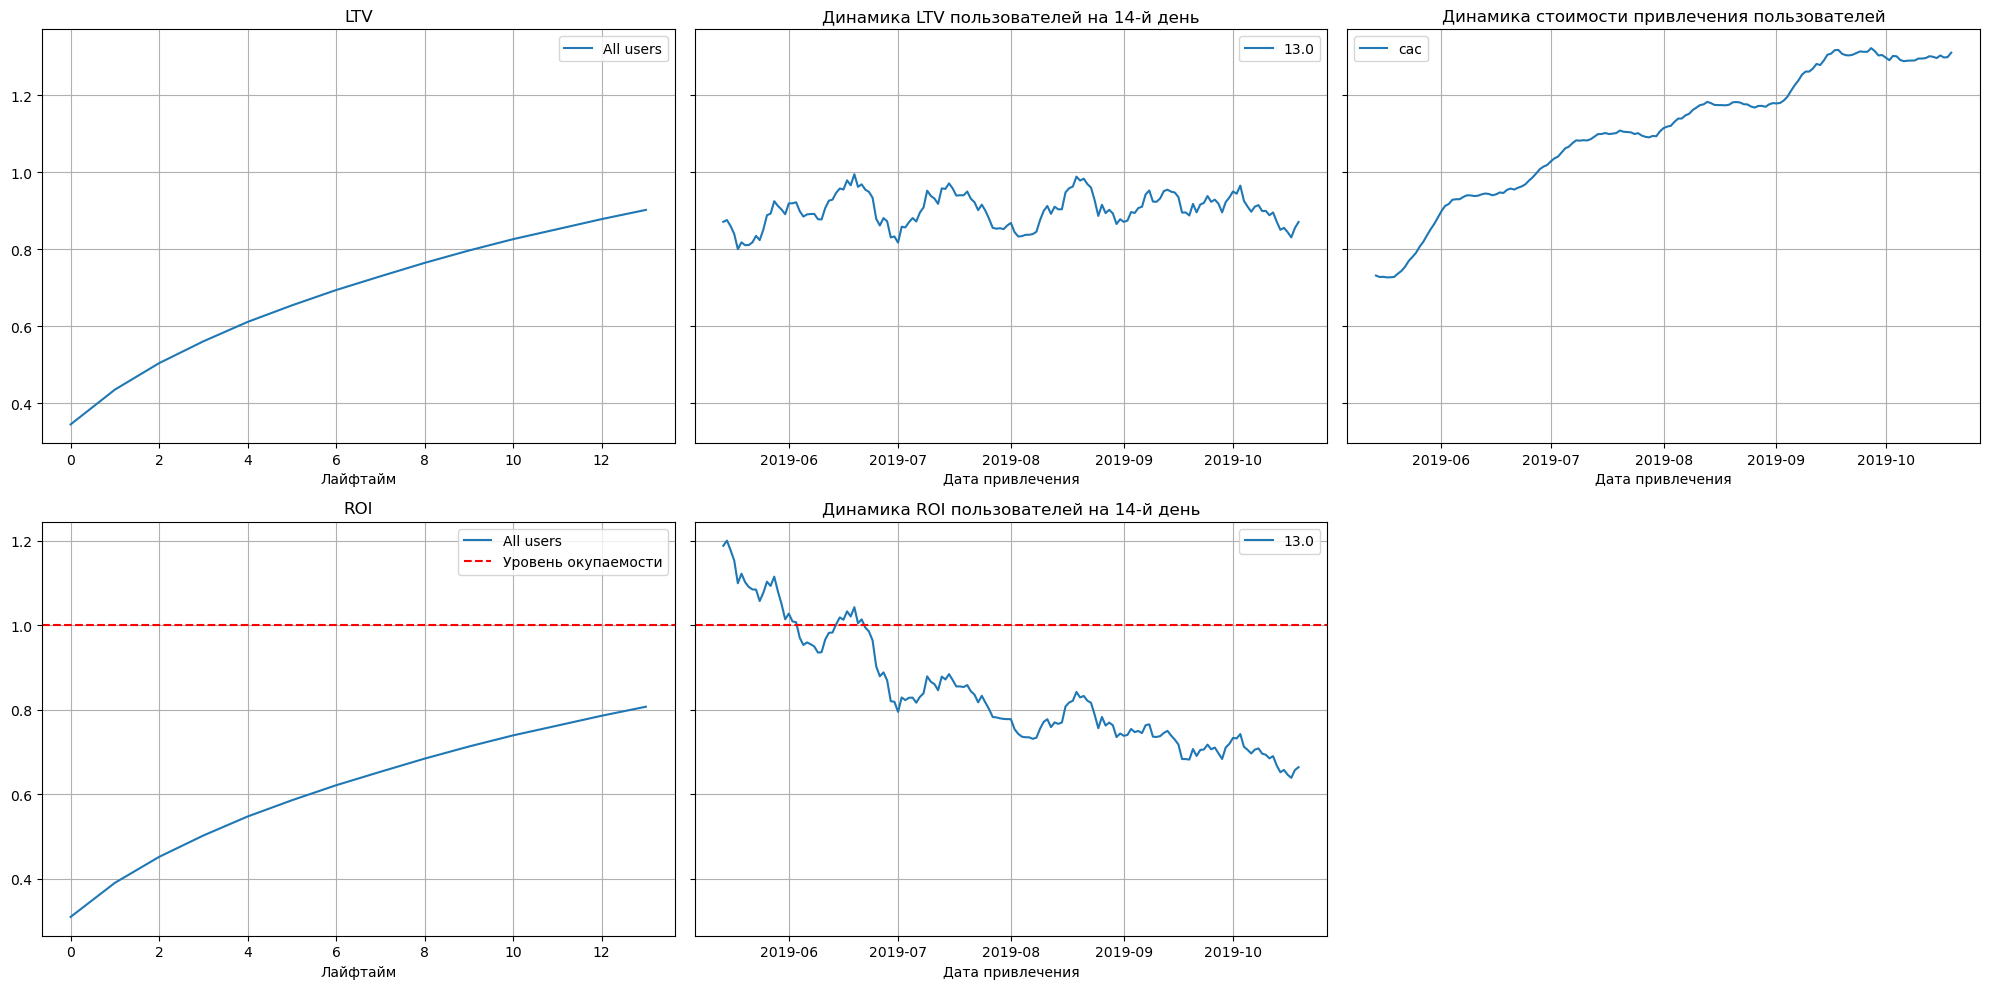

In [71]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Вывод**: LTV стабильно растет.Динамика LTV стабильна с незначительными сезонными колебаниями Стоимость привлечения пользователей растет на всем периоде наблюдений. Клиенты не выходят на уровень окупаемости на 14  
день. Динамика ROI клиетнов в июле снижается ниже уровня окупаемости.

In [72]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, ignore_horizon=False)

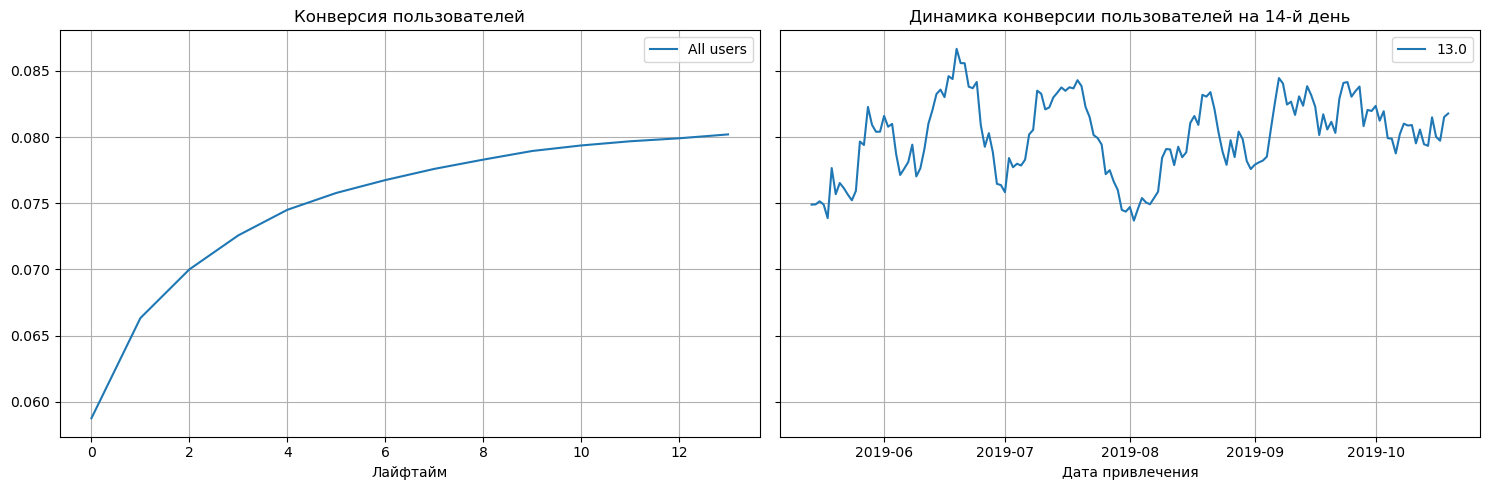

In [73]:
plot_conversion(conversion_grouped, conversion_history, horizon_days, window = 14) 

**Вывод**:
Конверсия пользователей достаточно стабильна, несмотря на сезонные провалы в июне и августе.

In [74]:
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, horizon_days, dimensions=[])

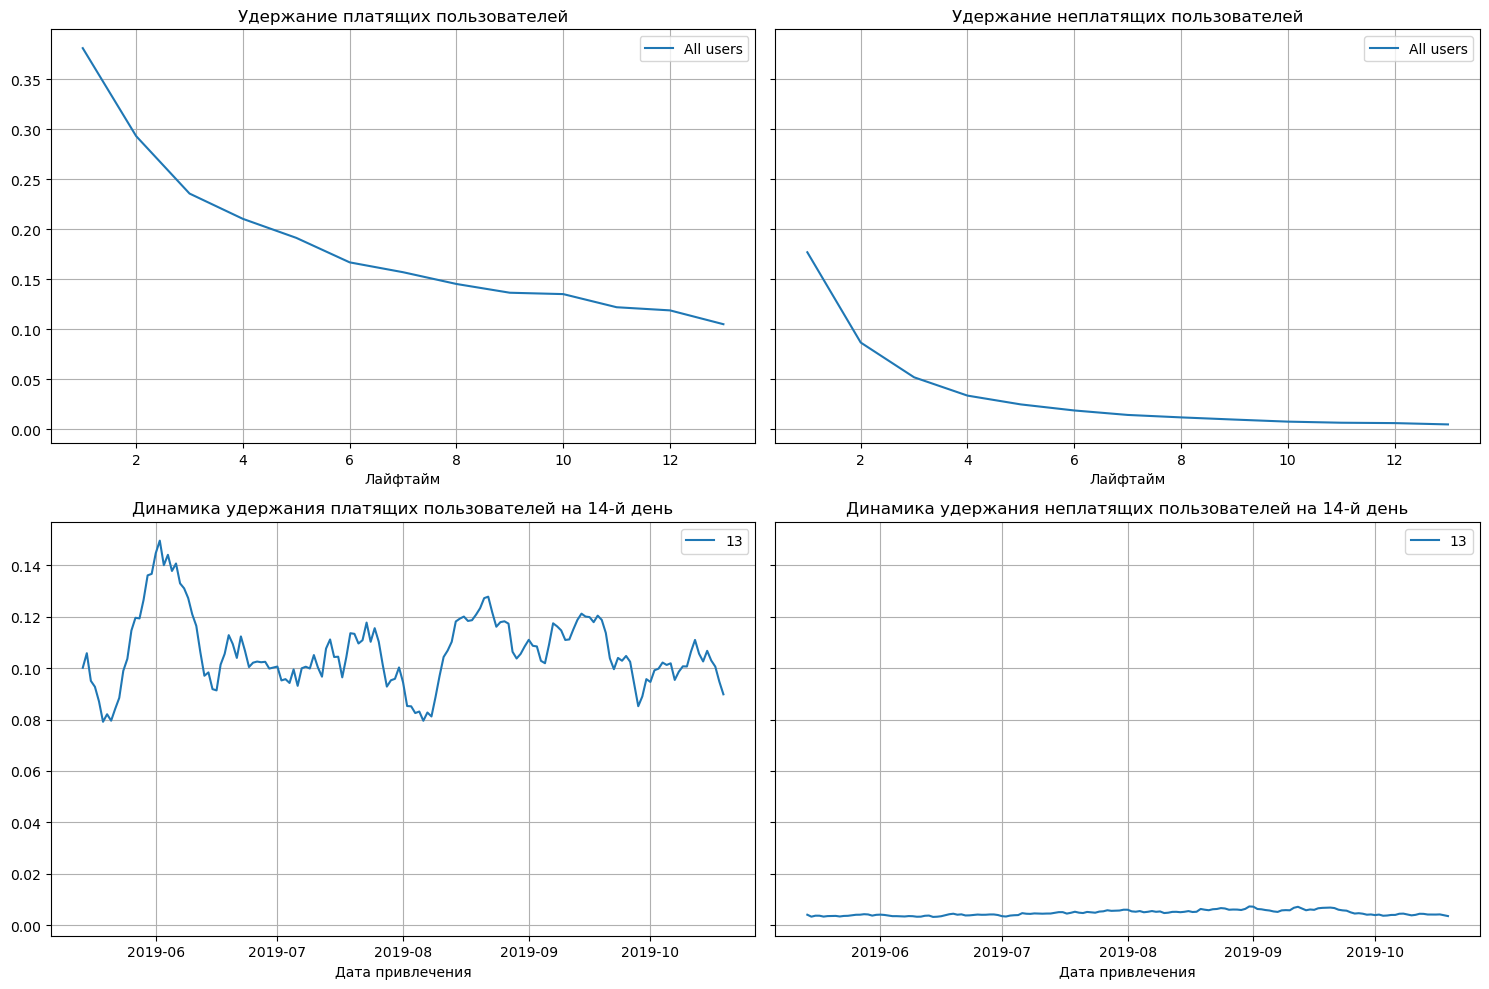

In [75]:
plot_retention(retention_grouped, retention_history,horizon_days, window = 14)

**Вывод**:
Удержание платящих пользователей выше удержания неплатящих пользователей. Динамика удержания платящих пользователей стабильна
(с несколькими сезонными пиками и провалами) 

In [76]:
retention_raw_country, retention_grouped_country, retention_history_country = get_retention(profiles, visits, observation_date, horizon_days, dimensions=['region'])

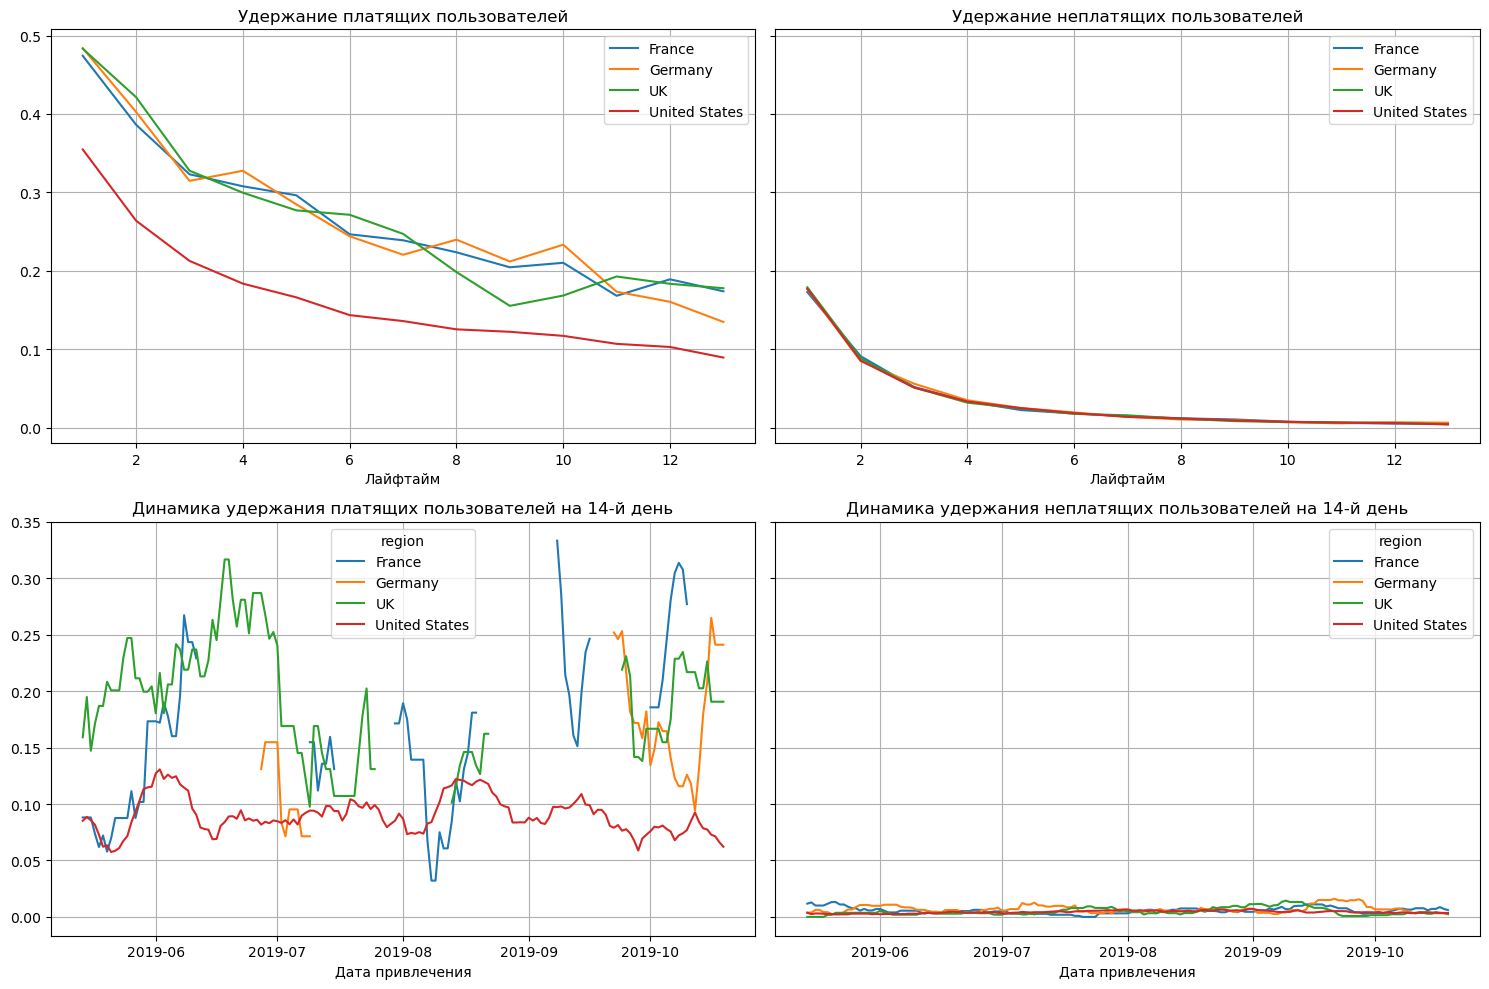

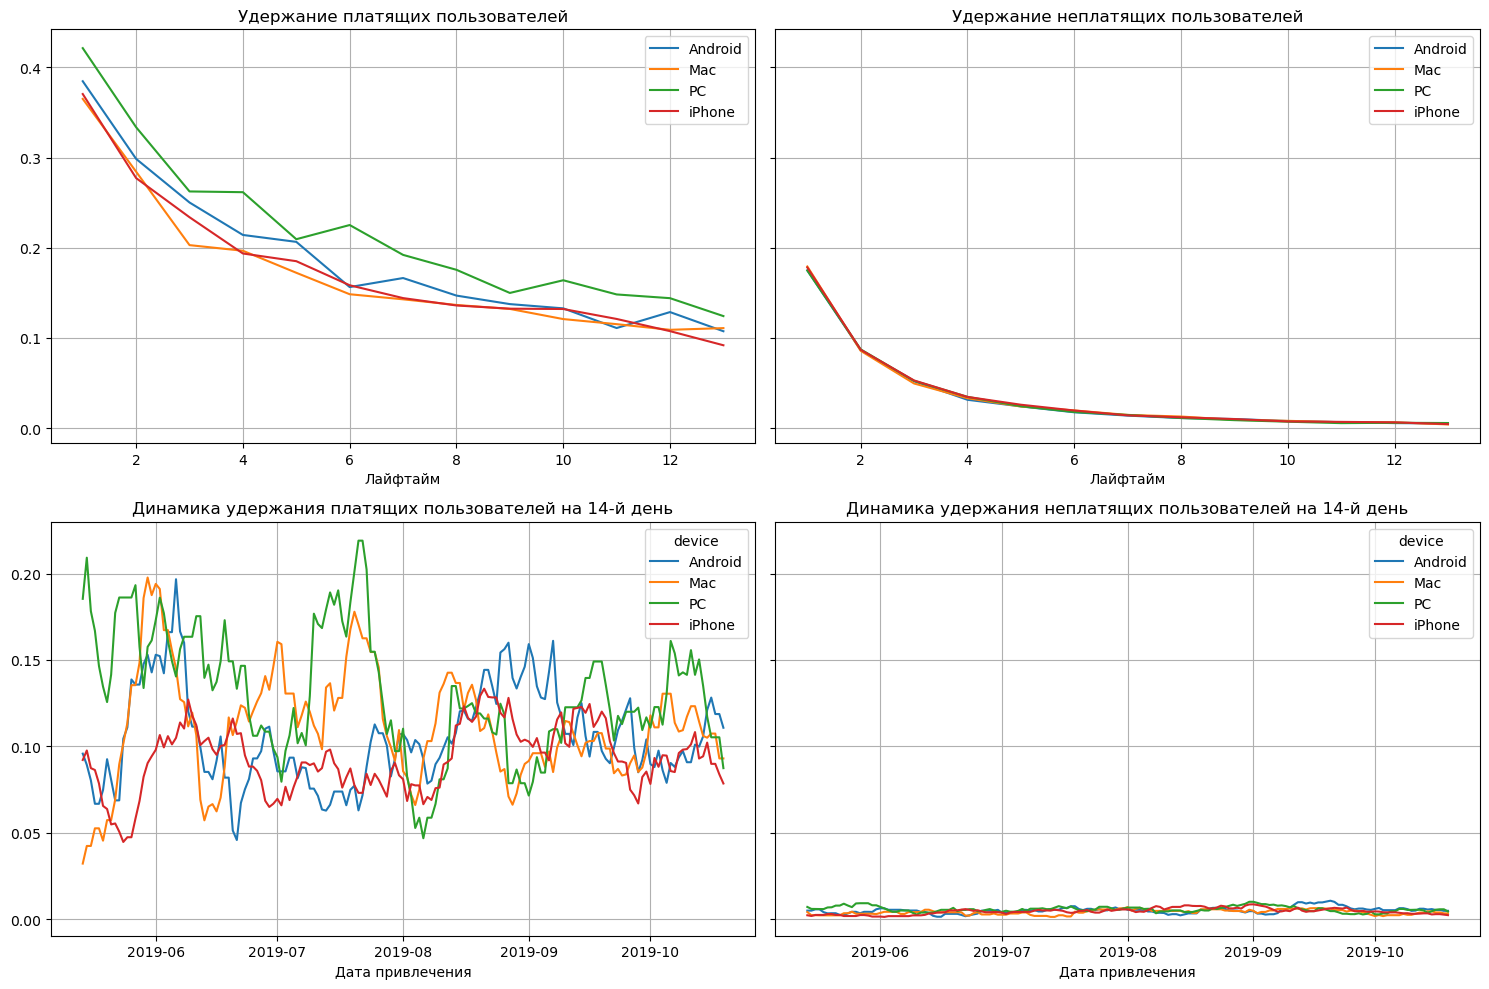

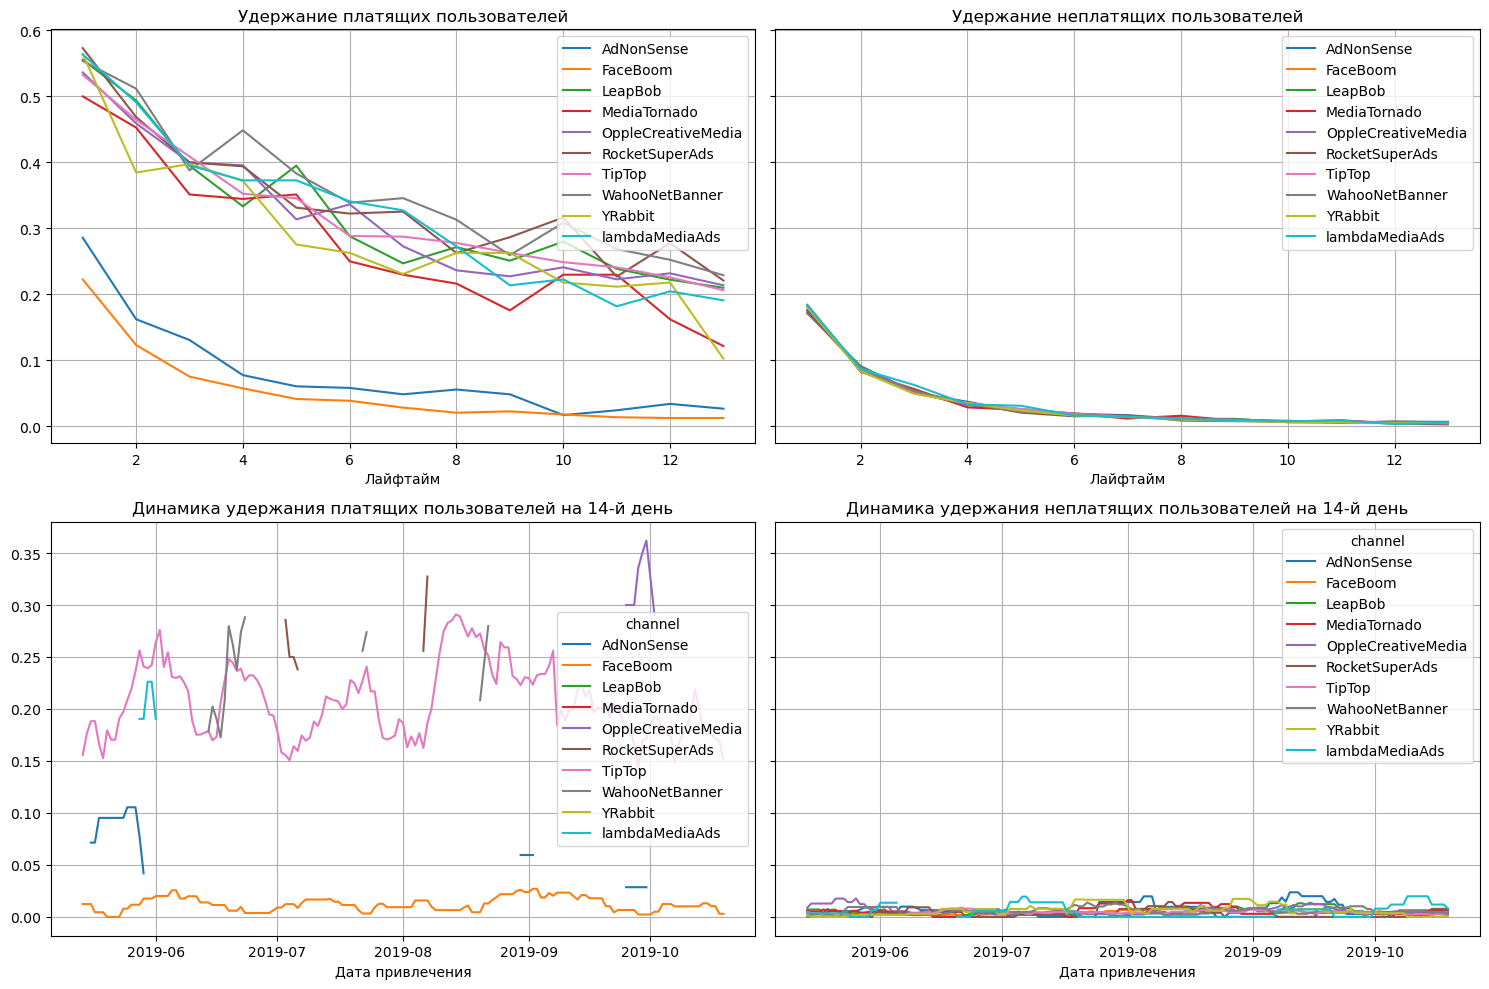

In [77]:
criterion = ['region', 'device', 'channel'] # зададим цикл для отображения удержания по критериям
for i in criterion:
    retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, horizon_days, dimensions=[i])
    plot_retention(retention_grouped, retention_history,horizon_days, window = 14)

**Вывод**:
- Удержание платящих пользователей из США ниже, чем в других регионах; Для неплатящих пользователей динамика примерно одинакова.
- Динамика удержания платящих пользователей скачкообразна для всех регионов, кроме США. Для неплатящих одинакова;
- Удержание платящих пользователй PC выше других устройств, но в целом имеет сходные значения. Для неплатящих пользователей одинаково для всех устройств.
- Динамика удержания пользователей скачкообразно, выделяется пик для PC и MAC в июле-августе. Для неплатящих пользователей динамика одинакова для всех устройств.
- наименьшее удержание платящих пользователей у каналов AdNonSence, FaceBoom. Остальные каналы имеют, в целом, одинаковые значения.
    </div>

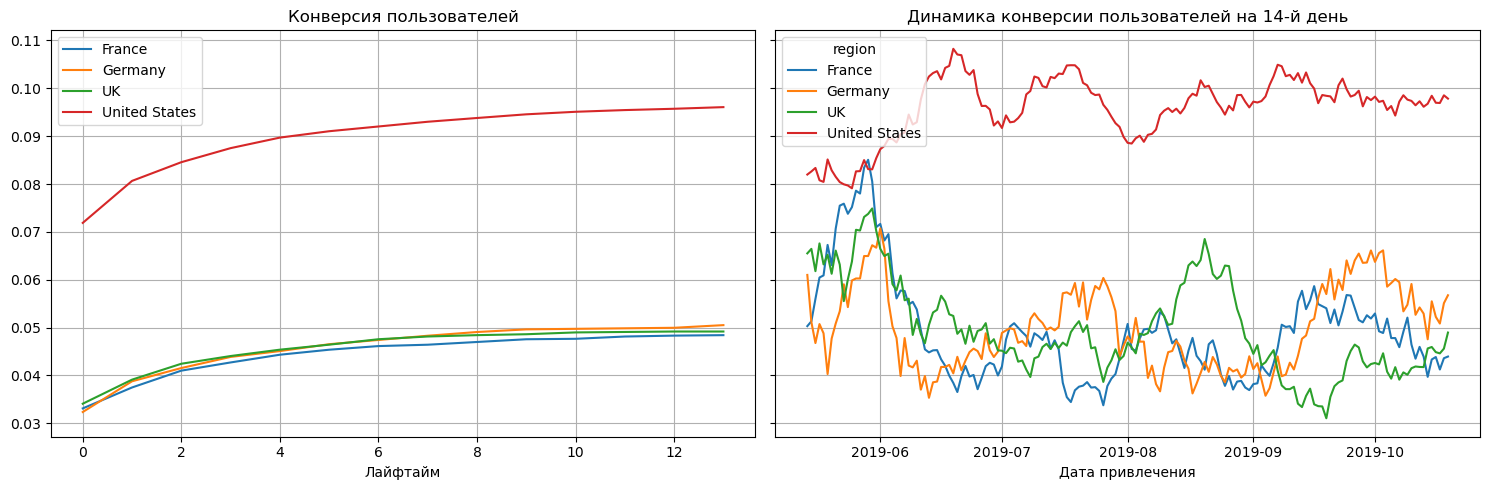

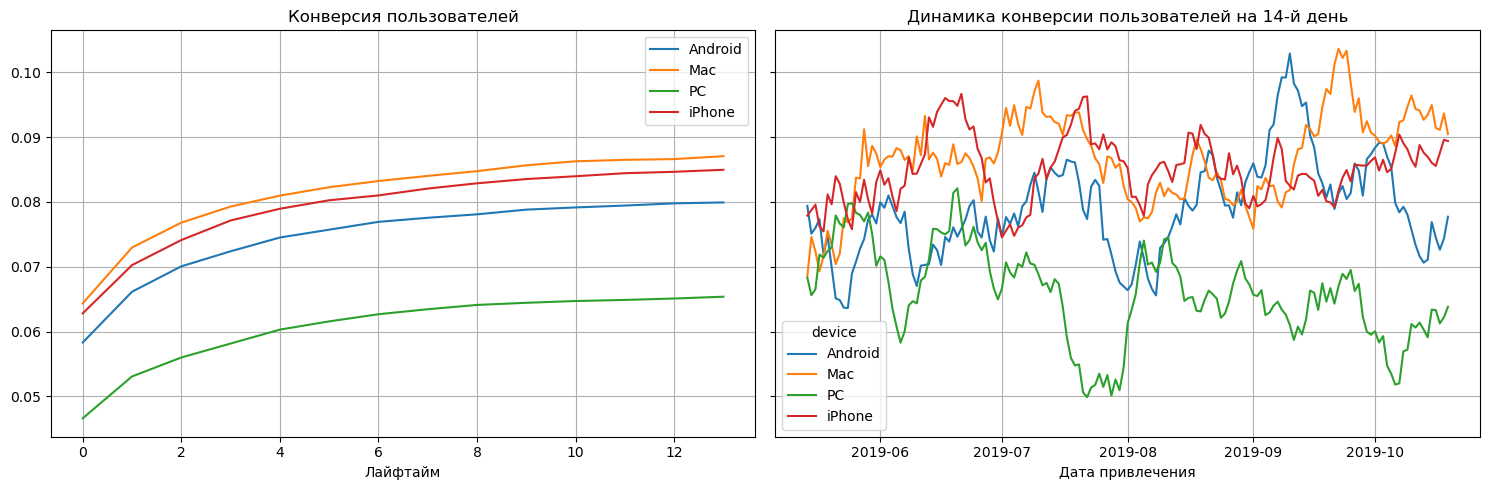

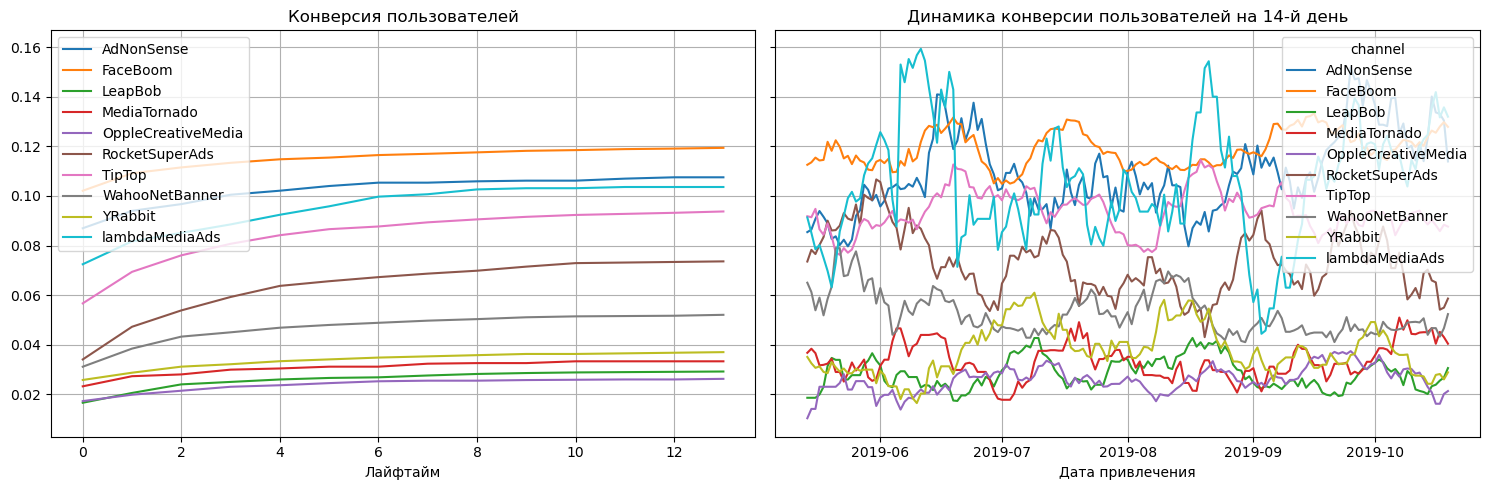

In [78]:
criterion = ['region', 'device', 'channel'] # зададим цикл для отображения удержания по критериям
for i in criterion:
    conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, ignore_horizon=False, dimensions=[i])
    plot_conversion(conversion_grouped, conversion_history, horizon_days, window = 14) 

**Вывод**:
- конверсия пользователей из США значительно выше других регионов. Динамика конверсии пользователей из США стабильно выше  
других регионов.
- конверсия пользователей MAC и IPhone на высоком уровне, пользователи PC имеют самую низкую конверсию; Динамика конверсии 
пользователей PC имеет небольшую тенденцию к снижению.
- Наибольшую конверсию имеют каналы FaceBoom, AdNonSense и lambadaMediaAds. Значительные пики в динамике конверсии у канала lambadaMediaAds в Июле и Августе.

In [79]:
ltv_raw_device, ltv_grouped_device, ltv_history_device, roi_grouped_device, roi_history_device = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = ['device'])

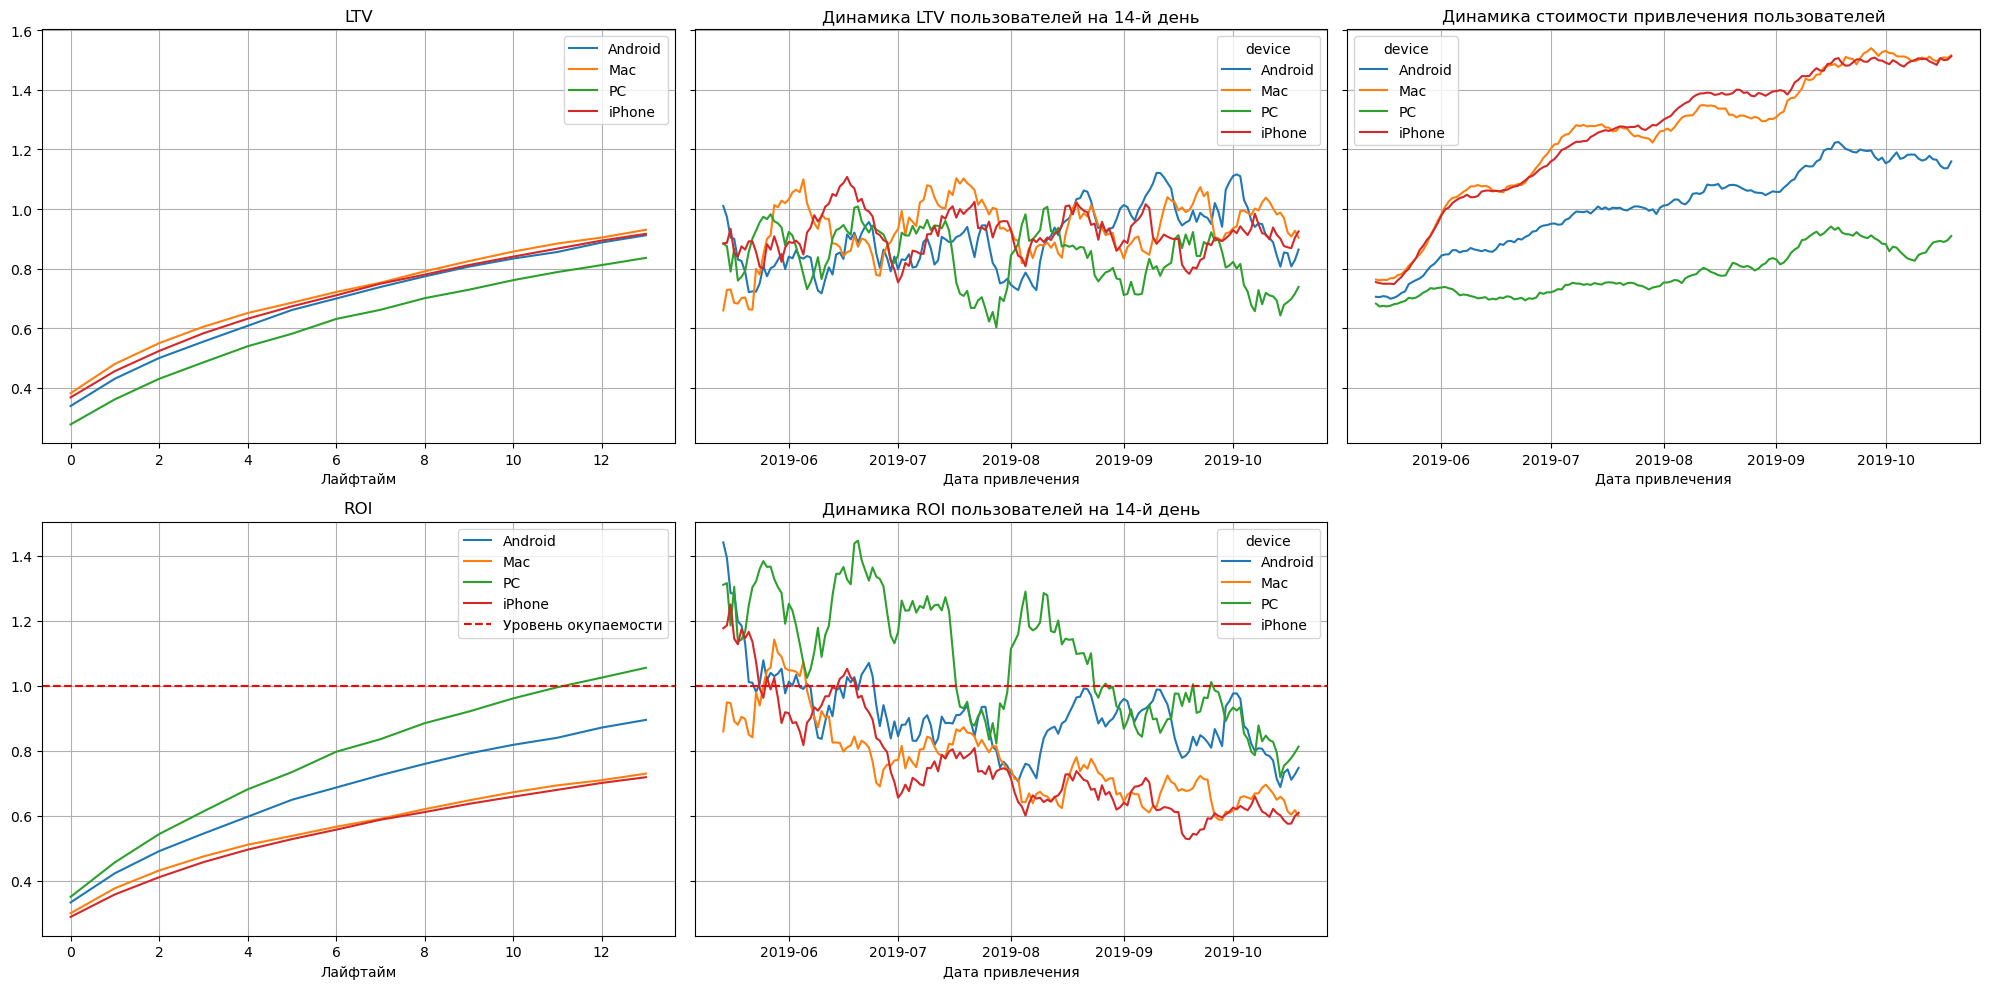

In [80]:
plot_ltv_roi(ltv_grouped_device, ltv_history_device, roi_grouped_device, roi_history_device, horizon_days, window = 14)

**Вывод**:
- LTV пользователей всех устройств стабильно растет с одинаковой динамикой. Динамика 
- LTV на всех устройствах стабильно с почти синхронными пиками и провалами на всех устройствах.
- CAC MAC и IPhone выше других устройств, и находятся примерно на одном уровне. CAC PC рос медленней всех.
- PC - единственное устройство приносящее прибыль;  - нулевая окупаемость; Android, МАС и iPhone - не окупаются. 

In [81]:
ltv_raw_country, ltv_grouped_country, ltv_history_country, roi_grouped_country, roi_history_country = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = ['region'])

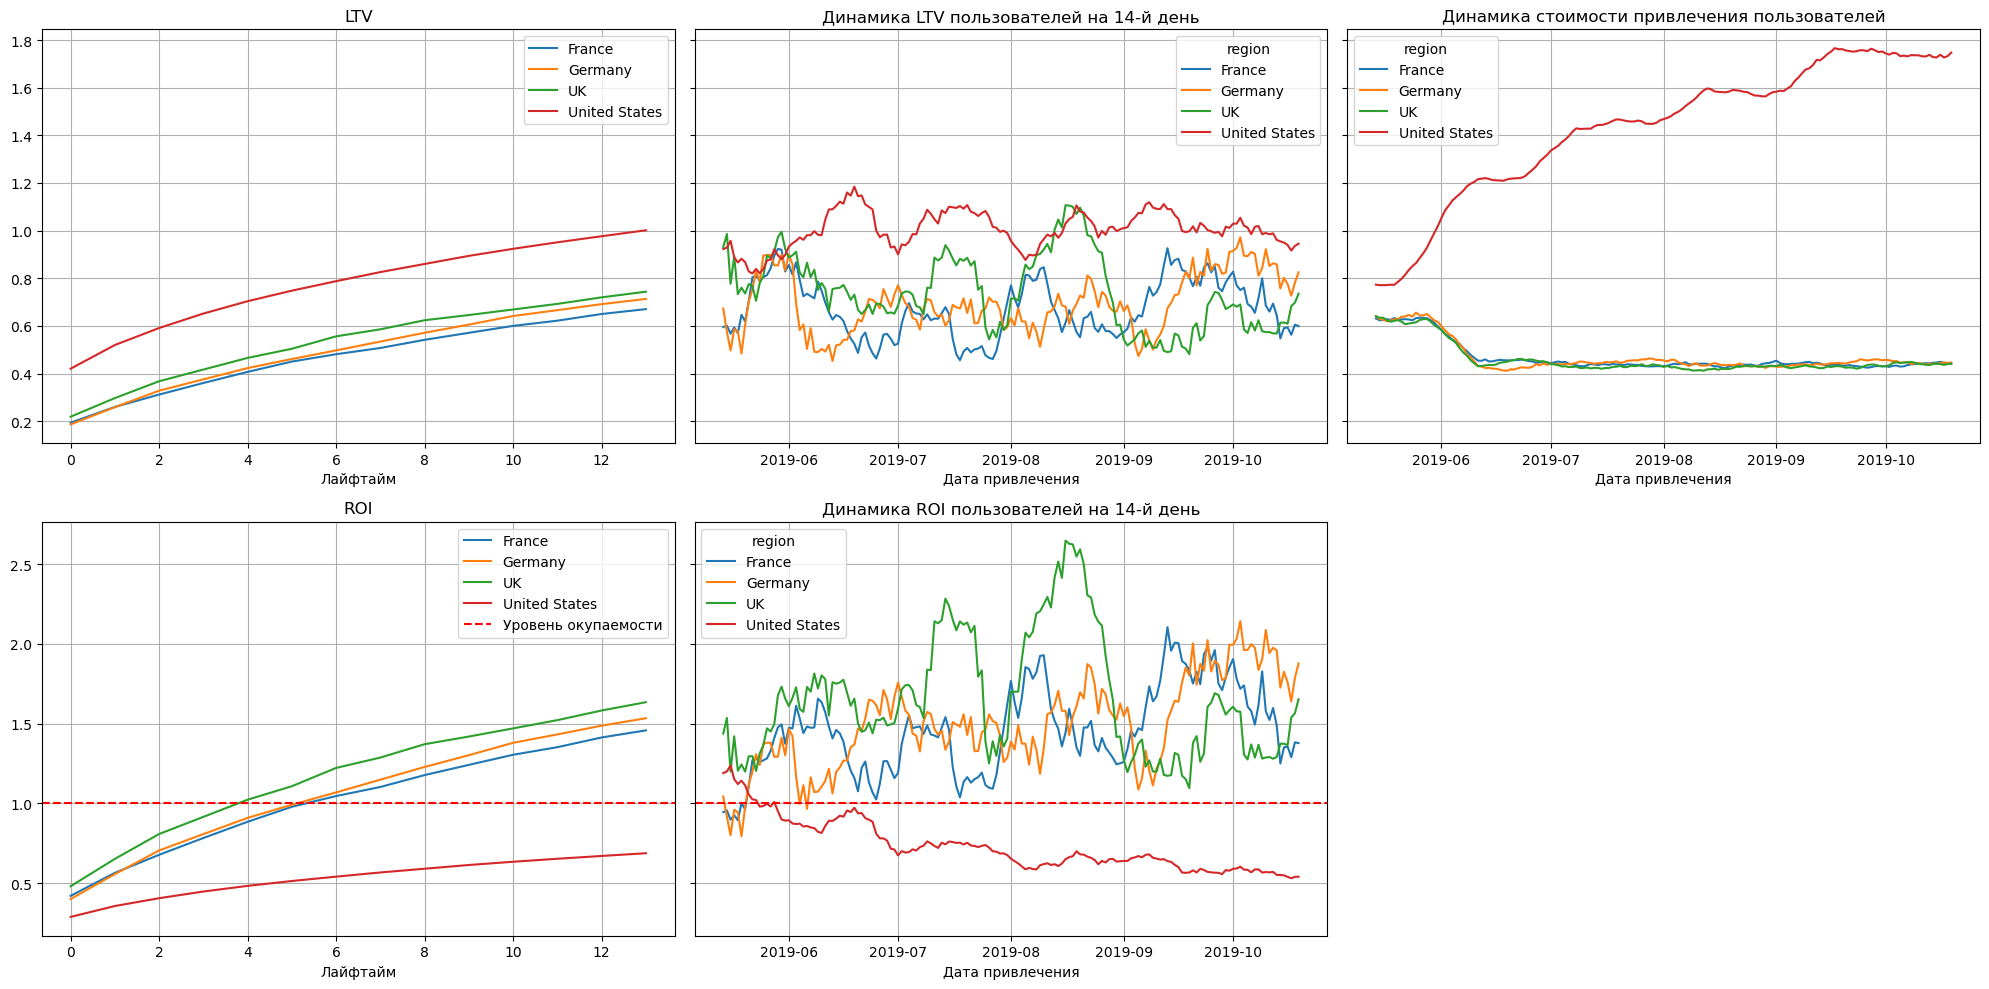

In [82]:
plot_ltv_roi(ltv_grouped_country, ltv_history_country, roi_grouped_country, roi_history_country, horizon_days, window = 14)

**Вывод**:
- LTV США выше, чем у других регионов. LTV растет с одной динамикой.
- Динамика LTV стабильна по всем регионам, кроме Великобритании.
- Стоймость привлечения пользователй в США изначально была выше, чем в других регионах, а современм выросла значительно, как  
в других регионах с июля стоймость привлечения снизилась.
- США единственный из регионов, который не окупается.
- США показывают худшую динамику ROI среди всех регионов. 

In [83]:
ltv_raw_channel, ltv_grouped_channel, ltv_history_channel, roi_grouped_channel, roi_history_channel = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = ['channel'])

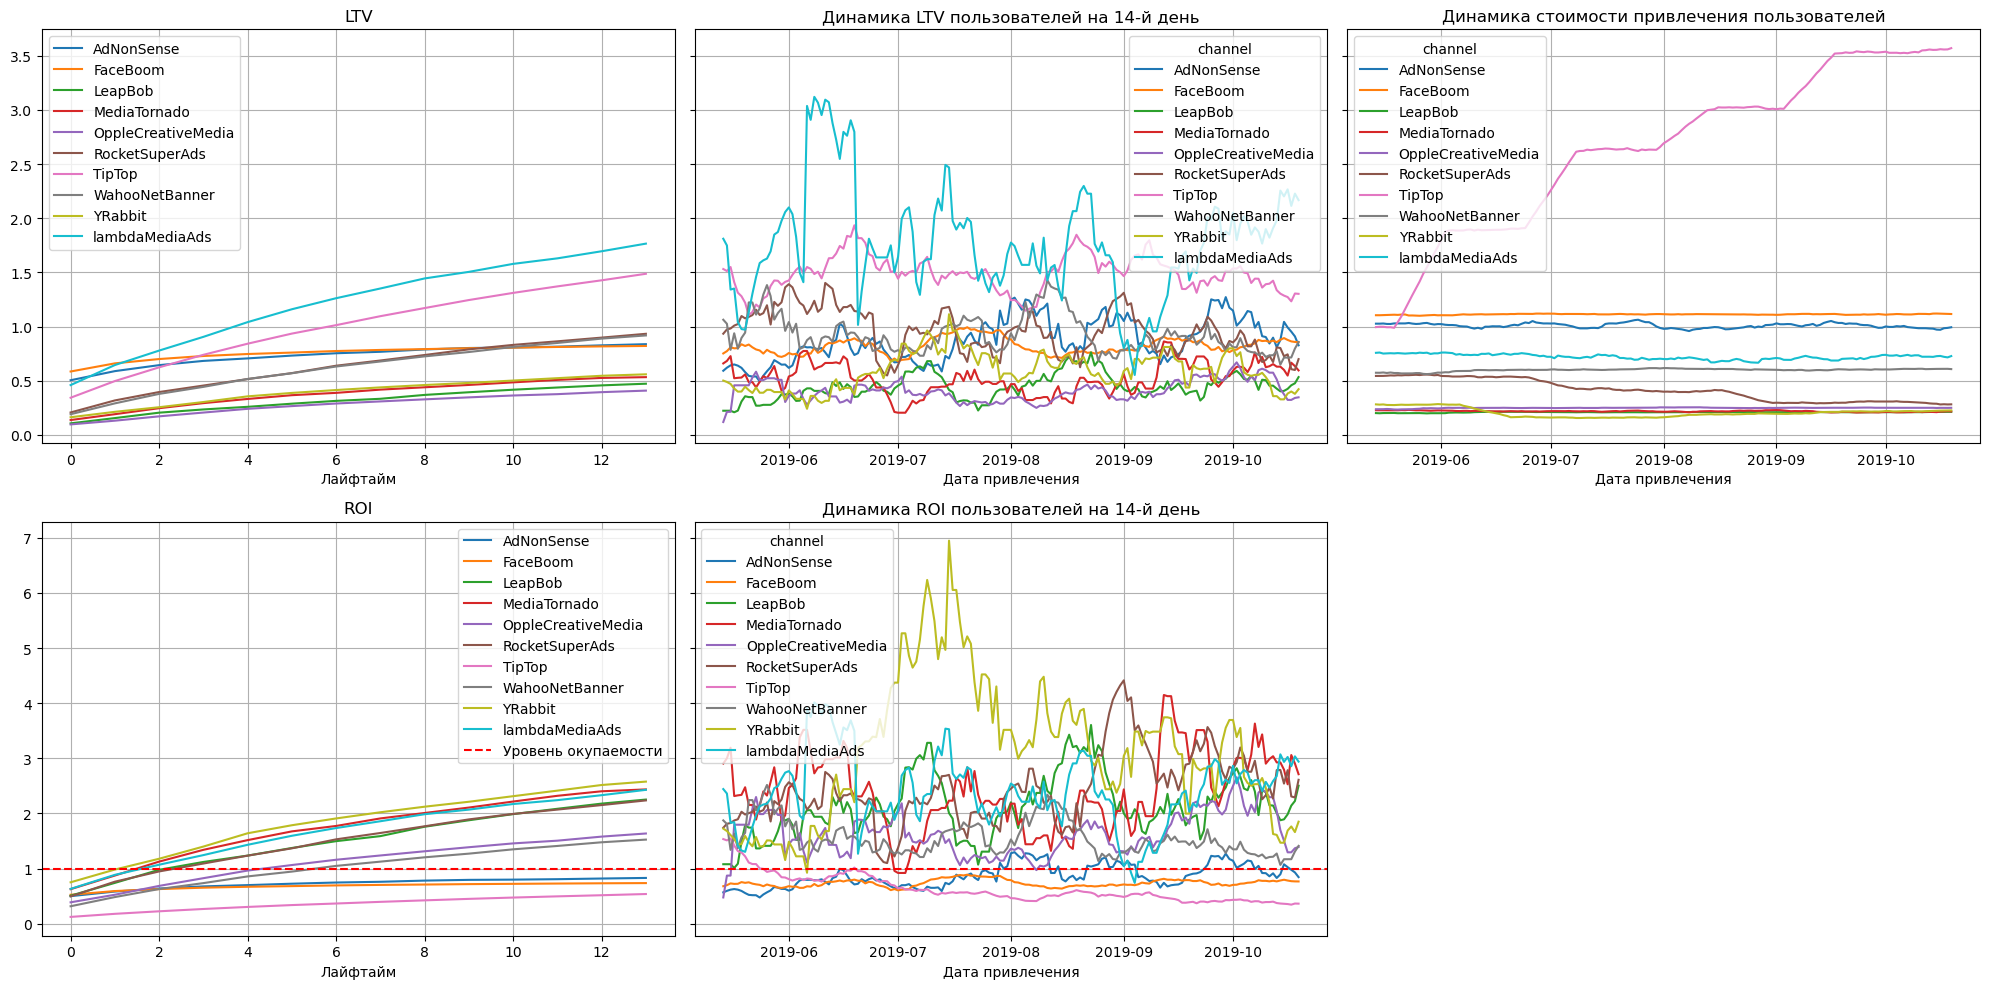

In [84]:
plot_ltv_roi(ltv_grouped_channel, ltv_history_channel, roi_grouped_channel, roi_history_channel, horizon_days, window = 14)

- Быстрее всего росло LTV канала lambadaMediaAds, что видно и по динамике на 14 день;
- Динамика стоимости привлечения у канала TipTop значительно росла на всем промежутке наблюдений. Стоймость привлечения пользователей по остальным каналам практически не менялась.
- AdNonSense имеет нулевую окупаемость, FaceBoom и TipTop находятся ниже уровня окупаемости, остальные каналы окупаются.
- Наибольшая динамика ROI была в июле-авгуте была у канала YRabbit, остальные каналы имели почти синхронные сезонные циклы (кроме каналов которые ниже уровня окупаемости).

#### Общий Вывод:
Проанализировав данные с мая по октябрь 2019 года можно сделать следующие выводы: 
- Реклама не окупается, так как показатель ROI, для всех пользователей, находятся ниже уровня окупаемости; При этом затраты на рекламу (САС) росли весь период наблюдений. Удержание пользователей и их конверсия при этом находятся в нормальных значениях.
- Смотря на пользователей в разрезе устройств можно сделать вывод о неэффективности расходования рекламных средств:
  - при изначально более высоких затратах привлечения пользователей и активном их росте на MAC и IPhone, по сравнению с PC и Android, пользователи этих устройств находятся ниже уровня окупаемости. Пользователи PC, при меньших затратах, единственные приносят прибыль.
- Смотря на пользователей в разрезе стран, так же можно сделать вывод о неэффективном расходовании рекламных средств:
  - США единственный регион не приносящий прибыль, при значительных и постоянно растущих затратах на привлечение пользователей. США изначально имеют негативную динамику ROI.
- Рассматривая каналы привлечения пользователей, можно сделать сделать следующие наблюдения:  
  - Канал Tip-Top имеет самые высокие и быстрорастущие расходы на привлечение одного пользователя, при этом это один из двух каналов привлечения не приносящих приыбли.
  Основными причинами общей неокупаемости рекламы: 
  - высокие траты на привлечение пользователей Mac и Iphone;
  - высокие траты на привлечение пользователей из США;
  - избыточные траты на привлечения пользователей из канала Tip-Top;
  Основной рекомендацией для увеличения окупаемости следует избрать снижение расходов на вышеперечисленные источники и регионы.

### Общий вывод:

- Имея следующие исходные данные:
  - данные о визитах; 
  - данные о заказах; 
  - данные о рекламных расходах.

- Провели предобработку данных привядя данные к нужным форматам и проверив на явные дубликаты.

Задали следующие функции для анализа метрик:
 get_profiles() — для создания профилей пользователей,  
 get_retention() — для подсчёта Retention Rate,  
 get_conversion() — для подсчёта конверсии,  
 get_ltv() — для подсчёта LTV.  
 filter_data() — для сглаживания данных,  
 plot_retention() — для построения графика Retention Rate,  
 plot_conversion() — для построения графика конверсии,  
 plot_ltv_roi — для визуализации LTV и ROI  
- Исользуя заднные функции:
  - построили профили пользователей и обозначили максимальную и минимальную дату привлечения (2019-10-27 и 01-05-2019);
  - построили таблицу, показывающую количество платящих пользователй по региону и выяснили, что США являются регионом с самым большим процентом платящих пользователей (~ 79%);
  - построили таблицу показывающую количество платящих пользователей по устройствам и выяснили, что IPhone является устройством с самым большим процентом платящих пользователей (~ 38%);
  - построили таблицу показывающую количество платящих пользователей, привлеченных различными каналами. Каналом привлекшим наибольшее количество платящих пользователей является FaceBoom (~ 46%).
- Оценили общие траты на маркетинг: 
  - посчитали общие расходы на маркетинг и процент затрат на каждый из рекламных каналов. Большую часть расходов принимают каналы TipTop (52%) и FaceBoom (31%).
  - посмотрели месячную и недельную динамику расходов на рекламу. По этой динамике наблюдаем значительный рост расходов на каналы Faceboom и TipTop.
  - Проанализировали траты на привлечение одного пользователя. В лидерах оказался канал TipTop с значением ~ 2.8.
- Оценили окупаемость рекламы:
  - проанализировав LTV, ROI и CAC для всех пользователей, сделали вывод о неокупаемости рекламы.
  - проанализировали держание и конверсию пользователей и пришли к выводу о их нормальных значениях.
  - в разрезе метрик по устройствам выявили пользователей устройств которые не окупаются (IPhone и Mac) и обнаружили высокие затраты на привлечение пользователей этих устройств.
  -  в разрезе метрик по регионам выявили, что пользователи из США не окупаются, при очень высоких затратах на привлечения одного пользователя. 
  - в разрезе метрик каналов выявили, что крупнейшие каналы привлечения пользователей Faceboom и TipTop не окупаются, при значительных затратах на канал TipTop.  
  
 Для окупаемости рекламы можно принять следующие меры: 
 - снизить затраты на привлечение пользоватлей Мac и IPhone;
 - снизить затраты на привлечение пользователей из США;
 - снизить затраты на привлечение пользователей из канала TipTop и Faceboom; **Высвобожденные средства следуюет реинвестировать в каналы: YRabbit, так как при минимальныех затратах на этот канал, он имеет очень хорошие значения ROI и динамики ROI. lambdaMediaAds, так как при средних значениях cac, канал входит в лидеры по количеству платящих пользователей и имеет хорошие значения LTV. Остальные каналы не имеют признаков перспективного вложения средств с быстрой отдачей**.
 - **Улучшить значение общей конверсии. Для этого необходимо улучшить показатели конверсии пользователей PC, конверсию пользователей из Европы и канала YRabbit**; 
 - **Улучшить значение общего удержания. Для этого необходимо улучшить показатели удержания пользователей США, а так же удержание пользователей канала FaceBoom и AdNonSense**